In [3]:
import numpy as np
import pandas as pd
import os
import json
import seaborn as sns
import matplotlib.pyplot as plt


pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

# dirpath = r"G:\Code\DataSets\dancing_on_the_edge_of_ddl\media_competetions_train\\"
BASEDIR = os.path.abspath('..')
DATASET = os.path.join(BASEDIR + '/media_competetions_train')

%matplotlib inline

In [4]:
# used_features_num = [9, 12, 13, 16, 19, 22, 23, 24, 27, 45, 60, 79, 80, 81]
print("[DEBUG] Working on {}".format(BASEDIR))
raw_data = pd.read_csv(BASEDIR + '/combined_data.csv',sep = ',', low_memory = False)

tol_rows = len(raw_data)
print('total indices: {}'.format(tol_rows))

tol_cols = raw_data.columns.size
print('total columns: {}'.format(tol_cols))

[DEBUG] Working on /home/yuchen/VSProjects/dancing_on_the_edge_of_ddl
total indices: 3677448
total columns: 89


In [54]:
raw_data.describe()

,Unnamed: 0,Unnamed: 0.1,Source Port,Destination Port,Protocol,Flow Duration,Total Fwd Packets,Total Backward Packets,Total Length of Fwd Packets,Total Length of Bwd Packets,Fwd Packet Length Max,Fwd Packet Length Min,Fwd Packet Length Mean,Fwd Packet Length Std,Bwd Packet Length Max,Bwd Packet Length Min,Bwd Packet Length Mean,Bwd Packet Length Std,Flow Bytes/s,Flow Packets/s,Flow IAT Mean,Flow IAT Std,Flow IAT Max,Flow IAT Min,Fwd IAT Total,Fwd IAT Mean,Fwd IAT Std,Fwd IAT Max,Fwd IAT Min,Bwd IAT Total,Bwd IAT Mean,Bwd IAT Std,Bwd IAT Max,Bwd IAT Min,Fwd PSH Flags,Bwd PSH Flags,Fwd URG Flags,Bwd URG Flags,Fwd Header Length,Bwd Header Length,Fwd Packets/s,Bwd Packets/s,Min Packet Length,Max Packet Length,Packet Length Mean,Packet Length Std,Packet Length Variance,FIN Flag Count,SYN Flag Count,RST Flag Count,PSH Flag Count,ACK Flag Count,URG Flag Count,CWE Flag Count,ECE Flag Count,Down/Up Ratio,Average Packet Size,Avg Fwd Segment Size,Avg Bwd Segment Size,Fwd Header Length.1,Fwd Avg Bytes/Bulk,Fwd Avg Packets/Bulk,Fwd Avg Bulk Rate,Bwd Avg Bytes/Bulk,Bwd Avg Packets/Bulk,Bwd Avg Bulk Rate,Subflow Fwd Packets,Subflow Fwd Bytes,Subflow Bwd Packets,Subflow Bwd Bytes,Init_Win_bytes_forward,Init_Win_bytes_backward,act_data_pkt_fwd,min_seg_size_forward,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Inbound
count,3.677448e+06,3.677448e+06,3.677448e+06,3.677448e+06,3.677448e+06,3.677448e+06,3.677448e+06,3.677448e+06,3.677448e+06,3.677448e+06,3.677448e+06,3.677448e+06,3.677448e+06,3.677448e+06,3.677448e+06,3.677448e+06,3.677448e+06,3.677448e+06,3.605849e+06,3.677448e+06,3.677448e+06,3.677448e+06,3.677448e+06,3.677448e+06,3.677448e+06,3.677448e+06,3.677448e+06,3.677448e+06,3.677448e+06,3.677448e+06,3.677448e+06,3.677448e+06,3.677448e+06,3.677448e+06,3.677448e+06,3677448.0,3677448.0,3677448.0,3.677448e+06,3.677448e+06,3.677448e+06,3.677448e+06,3.677448e+06,3.677448e+06,3.677448e+06,3.677448e+06,3.677448e+06,3677448.0,3.677448e+06,3.677448e+06,3677448.0,3.677448e+06,3.677448e+06,3.677448e+06,3677448.0,3.677448e+06,3.677448e+06,3.677448e+06,3.677448e+06,3.677448e+06,3677448.0,3677448.0,3677448.0,3677448.0,3677448.0,3677448.0,3.677448e+06,3.677448e+06,3.677448e+06,3.677448e+06,3.677448e+06,3.677448e+06,3.677448e+06,3.677448e+06,3.677448e+06,3.677448e+06,3.677448e+06,3.677448e+06,3.677448e+06,3.677448e+06,3.677448e+06,3.677448e+06,3.677448e+06
mean,2.634755e+06,9.340821e+04,2.563113e+04,3.144815e+04,1.480268e+01,1.874086e+06,8.858215e+00,4.460621e-01,3.692528e+03,3.097510e+02,5.925297e+02,5.725997e+02,5.828014e+02,7.359969e+00,1.948005e+01,2.329930e+00,6.135084e+00,4.990521e+00,inf,inf,2.097831e+05,3.463534e+05,8.517014e+05,7.777531e+02,1.855462e+06,2.285669e+05,3.629481e+05,8.411717e+05,6.847448e+02,4.943060e+05,3.754911e+04,8.098317e+04,2.365652e+05,2.303932e-01,8.351988e-03,0.0,0.0,0.0,-1.204290e+08,-3.987861e+05,1.042737e+06,5.981889e+02,5.724780e+02,6.053433e+02,5.844264e+02,1.022285e+01,4.067075e+03,0.0,2.841645e-04,8.351988e-03,0.0,1.705493e-01,2.663206e-02,1.232811e-02,0.0,7.344767e-02,8.437407e+02,5.828014e+02,6.135084e+00,-1.204290e+08,0.0,0.0,0.0,0.0,0.0,0.0,8.858215e+00,3.692528e+03,4.460621e-01,3.097510e+02,1.406732e+03,2.213626e+02,6.614310e+00,-3.729793e+07,5.376072e+03,2.021209e+03,8.056292e+03,4.145755e+03,5.774459e+05,9.501246e+04,6.837889e+05,4.936635e+05,9.482386e-01
std,4.156242e+06,1.367278e+05,2.524382e+04,1.982603e+04,4.418725e+00,1.160387e+07,2.696834e+02,1.050504e+01,2.229566e+04,2.944745e+04,5.410231e+02,5.439962e+02,5.384788e+02,3.578606e+01,2.798491e+02,1.805143e+01,6.336816e+01,6.810232e+01,NaN,NaN,1.047396e+06,1.690137e+06,4.741287e+06,6.259308e+04,1.158944e+07,1.135492e+06,1.805377e+06,4.722271e+06,6.326590e+04,6.843355e+06,6.443994e+05,1.253960e+06,3.449931e+06,2.557396e+00,9.100678e-02,0.0,0.0,0.0,2.327433e+09,2.909002e+07,9.171655e+05,1.364309e+04,5.439488e+02,5.908110e+02,5.376873e+02,6.294895e+01,1.351434e+05,0.0,1.685479e-02,9.100678e-02,0.0,3.761147e-01,1.610056e-01,1

In [32]:
column_headers = raw_data.columns.values.tolist()
ids = list( range(0, len(column_headers)) )
dictc = dict(zip(ids, column_headers))
print(json.dumps(dictc, indent=4, ensure_ascii=False))

{
    "0": "Unnamed: 0",
    "1": "Unnamed: 0.1",
    "2": "Flow ID",
    "3": "Source IP",
    "4": "Source Port",
    "5": "Destination IP",
    "6": "Destination Port",
    "7": "Protocol",
    "8": "Timestamp",
    "9": "Flow Duration",
    "10": "Total Fwd Packets",
    "11": "Total Backward Packets",
    "12": "Total Length of Fwd Packets",
    "13": "Total Length of Bwd Packets",
    "14": "Fwd Packet Length Max",
    "15": "Fwd Packet Length Min",
    "16": "Fwd Packet Length Mean",
    "17": "Fwd Packet Length Std",
    "18": "Bwd Packet Length Max",
    "19": "Bwd Packet Length Min",
    "20": "Bwd Packet Length Mean",
    "21": "Bwd Packet Length Std",
    "22": "Flow Bytes/s",
    "23": "Flow Packets/s",
    "24": "Flow IAT Mean",
    "25": "Flow IAT Std",
    "26": "Flow IAT Max",
    "27": "Flow IAT Min",
    "28": "Fwd IAT Total",
    "29": "Fwd IAT Mean",
    "30": "Fwd IAT Std",
    "31": "Fwd IAT Max",
    "32": "Fwd IAT Min",
    "33": "Bwd IAT Total",
    "34": "Bwd

Text(0.5,1,'Label Proportions and Counts')

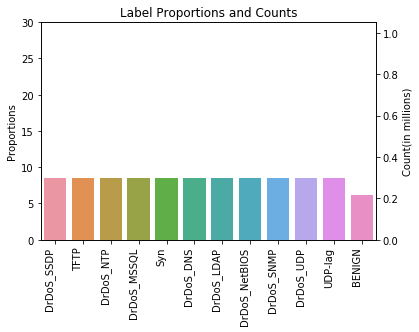

In [30]:

# 统计Label的分布
label_count = raw_data['Label'].value_counts(normalize=True) * 100
ax_prop = sns.barplot(x=label_count.index, y = label_count.values)
ax_cnt = ax_prop.twinx()
ax_prop.set_ylabel('Proportions')
ax_cnt.set_ylabel('Count(in millions)')
ax_cnt.set_xlabel('Flow Labels')
ax_prop.set_ylim(0,30)
ax_cnt.set_ylim(0, len(raw_data) / (1e6*3.5))
# ax_prop.set_xticklabels(ax_prop.get_xticklabels(), ha="right", rotation=60)
ax_prop.set_xticklabels(ax_prop.get_xticklabels(), ha="right", rotation=90)
# plt.tight_layout()
plt.title('Label Proportions and Counts')

Text(0.5,1,'Protocol Type (0:HOPOPT 6:TCP 17:UDP)')

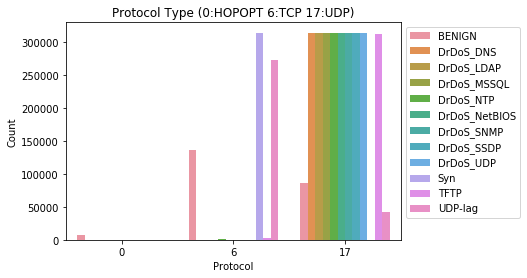

In [41]:
protocol_cnt = pd.crosstab(raw_data['Protocol'], raw_data['Label'])
protocol_cnt = protocol_cnt.stack().reset_index().rename(columns={0: 'Count'})
ax_ptl = sns.barplot(x=protocol_cnt['Protocol'], y=protocol_cnt['Count'], hue=protocol_cnt['Label'])
ax_ptl.legend(loc='best', bbox_to_anchor=(1,1))
plt.title('Protocol Type (0:HOPOPT 6:TCP 17:UDP)')

Text(0.5,1,'total Fwd/Bwd packets')

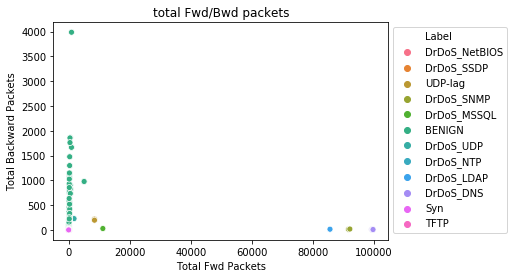

In [46]:
# 此处分析 x='Tot Fwd Pkts', y='Tot Bwd Pkts'
# "10": "Total Fwd Packets"
# "11": "Total Backward Packets"
ax_tol_b_pkts = sns.scatterplot(x='Total Fwd Packets', y='Total Backward Packets', hue='Label', data=raw_data.sample(100000, random_state=42))
ax_tol_b_pkts.legend(loc='best', bbox_to_anchor=(1,1))
plt.title('total Fwd/Bwd packets')

Text(0.5,1,'Bwd IAT Tot - Fwd IAT Tot')

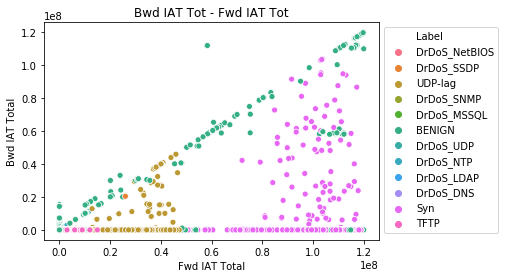

In [52]:
# abs(Bwd IAT Tot - Fwd IAT Tot) 特别高，所以可以建立一个新的特征
ax_IAT = sns.scatterplot(x='Fwd IAT Total', y='Bwd IAT Total', hue='Label', data=raw_data.sample(100000, random_state=42))
ax_IAT.legend(loc='best', bbox_to_anchor=(1, 1))
plt.title('Bwd IAT Tot - Fwd IAT Tot')

Text(0.5,1,'Fwd Header Length - Bwd Header Length')

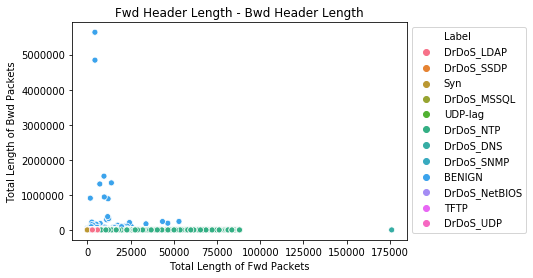

In [59]:
ax_header_l = sns.scatterplot(x='Total Length of Fwd Packets', y='Total Length of Bwd Packets', hue='Label', data=raw_data.sample(100000, random_state=21))
ax_header_l.legend(loc='best', bbox_to_anchor=(1, 1))
plt.title('Fwd Header Length - Bwd Header Length')

In [ ]:
num_cols = raw_data.select_dtypes(exclude=['category', 'datetime64[ns]']).columns
fwd_cols = [col for col in num_cols if 'Fwd' in col]
bwd_cols = [col for col in num_cols if 'Bwd' in col]